## Hello there

Načtení dat & inicializace

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from random import sample

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

import CHAID
import math

pd.set_option('mode.chained_assignment',None)

In [15]:
# Import dataset

#JÁRA načtení tam kde to mám uložené
data = pd.read_csv('C:/Users/macou/OneDrive/Dokumenty/ukol1datascience/hw1_devsample.csv', encoding='utf-8')

#FANDOVO načtení dat
#data_all = pd.read_csv('.../hw1_devsample.csv', encoding='utf-8')

print(f'Number of rows:      {data.shape[0]}')
print(f'Number of columns:   {data.shape[1]}')

Number of rows:      80000
Number of columns:   197


In [16]:
#kaggle competitions download -c mff-data-science-2-hw1
#nejde mi to pomoci tohoto nahrát tak jsem to udělal ručně
for col in data.columns:
    print(col)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

hodně sloupců na výběr prediktorů 

In [17]:
for col in data.columns:
    print(col,data[col].dtypes)

SK_ID_CURR int64
TARGET float64
NAME_CONTRACT_TYPE object
CODE_GENDER object
FLAG_OWN_CAR object
FLAG_OWN_REALTY object
CNT_CHILDREN float64
AMT_INCOME_TOTAL float64
AMT_CREDIT float64
AMT_ANNUITY float64
AMT_GOODS_PRICE float64
NAME_TYPE_SUITE object
NAME_INCOME_TYPE object
NAME_EDUCATION_TYPE object
NAME_FAMILY_STATUS object
NAME_HOUSING_TYPE object
REGION_POPULATION_RELATIVE float64
DAYS_BIRTH float64
DAYS_EMPLOYED int64
DAYS_REGISTRATION float64
DAYS_ID_PUBLISH int64
OWN_CAR_AGE float64
FLAG_MOBIL int64
FLAG_EMP_PHONE int64
FLAG_WORK_PHONE int64
FLAG_CONT_MOBILE int64
FLAG_PHONE int64
FLAG_EMAIL int64
OCCUPATION_TYPE object
CNT_FAM_MEMBERS float64
REGION_RATING_CLIENT int64
REGION_RATING_CLIENT_W_CITY int64
WEEKDAY_APPR_PROCESS_START object
HOUR_APPR_PROCESS_START int64
REG_REGION_NOT_LIVE_REGION int64
REG_REGION_NOT_WORK_REGION int64
LIVE_REGION_NOT_WORK_REGION int64
REG_CITY_NOT_LIVE_CITY int64
REG_CITY_NOT_WORK_CITY int64
LIVE_CITY_NOT_WORK_CITY int64
ORGANIZATION_TYPE object
EX

In [18]:
for col in data.columns:
    if data[col].dtypes=="float64":
        a=np.isinf(data[col]).sum()
        print(a)
        print(col)
        
        print(data[col].max())
        print('----------------------')
    
    

0
TARGET
1.0
----------------------
0
CNT_CHILDREN
12.0
----------------------
0
AMT_INCOME_TOTAL
13500000.0
----------------------
0
AMT_CREDIT
4050000.0
----------------------
0
AMT_ANNUITY
225000.0
----------------------
0
AMT_GOODS_PRICE
4050000.0
----------------------
0
REGION_POPULATION_RELATIVE
0.072508
----------------------
0
DAYS_BIRTH
-7489.0
----------------------
0
DAYS_REGISTRATION
0.0
----------------------
0
OWN_CAR_AGE
65.0
----------------------
0
CNT_FAM_MEMBERS
16.0
----------------------
0
EXT_SOURCE_1
0.9439822386623056
----------------------
0
EXT_SOURCE_2
0.8549996664047012
----------------------
0
EXT_SOURCE_3
0.8939760746042866
----------------------
0
APARTMENTS_AVG
1.0
----------------------
0
BASEMENTAREA_AVG
1.0
----------------------
0
YEARS_BEGINEXPLUATATION_AVG
1.0
----------------------
0
YEARS_BUILD_AVG
1.0
----------------------
0
COMMONAREA_AVG
1.0
----------------------
0
ELEVATORS_AVG
1.0
----------------------
0
ENTRANCES_AVG
1.0
---------------

### Zatím vypouštím hodnoty nekonečno nevím jak jinak vyřešit

zatím vyhodím sloupce kde se nachází infinity hodnoty

In [19]:
#sloupce s INF hodnotama
'MEAN_AMTCR_1M_3M_DIV_MEAN_AMTCR_3M_12M','MEAN_AMTCR_1M_3M_TYPE_EQ_ACTIVE_DIV_MEAN_AMTCR_3M_12M_TYPE_EQ_ACTIVE',
'MEAN_AMTCR_1M_3M_TYPE_EQ_CLOSED_DIV_MEAN_AMTCR_3M_12M_TYPE_EQ_CLOSED','MEAN_AMTCR_OVERDUE_0M_INFM_DIV_MEAN_AMTCR_0M_INFM',
'MEAN_AMTCR_OVERDUE_0M_12M_DIV_MEAN_AMTCR_0M_12M','MEAN_AMTCR_OVERDUE_0M_INFM_TYPE_EQ_ACTIVE_DIV_MEAN_AMTCR_0M_INFM_TYPE_EQ_ACTIVE',
'MEAN_AMTCR_OVERDUE_0M_12M_TYPE_EQ_ACTIVE_DIV_MEAN_AMTCR_0M_12M_TYPE_EQ_ACTIVE'

'MEAN_AMTCR_OVERDUE_0M_12M_TYPE_EQ_ACTIVE_DIV_MEAN_AMTCR_0M_12M_TYPE_EQ_ACTIVE'

In [20]:
for col in data.columns:
    if data[col].dtypes=='object' :
        print(col)
        print(data[col].value_counts())
        print('===================================')
        print('-----------------------------------')
    

NAME_CONTRACT_TYPE
Cash loans         72366
Revolving loans     7634
Name: NAME_CONTRACT_TYPE, dtype: int64
-----------------------------------
CODE_GENDER
F      52488
M      27510
XNA        2
Name: CODE_GENDER, dtype: int64
-----------------------------------
FLAG_OWN_CAR
N    52682
Y    27318
Name: FLAG_OWN_CAR, dtype: int64
-----------------------------------
FLAG_OWN_REALTY
Y    55485
N    24515
Name: FLAG_OWN_REALTY, dtype: int64
-----------------------------------
NAME_TYPE_SUITE
Unaccompanied      64664
Family             10371
Spouse, partner     3033
Children             853
Other_B              436
Other_A              220
Group of people       70
Name: NAME_TYPE_SUITE, dtype: int64
-----------------------------------
NAME_INCOME_TYPE
Working                 41321
Commercial associate    18699
Pensioner               14365
State servant            5602
Student                     8
Unemployed                  4
Businessman                 1
Name: NAME_INCOME_TYPE, dtype: in

U všech typu object se mi zdá nepoužitelný: WEEKDAY_APPR_PROCESS_START, TIME

In [21]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,MEAN_AMTCR_OVERDUE_0M_INFM_TYPE_EQ_ACTIVE_DIV_MEAN_AMTCR_0M_INFM_TYPE_EQ_ACTIVE,MEAN_AMTCR_OVERDUE_0M_12M_TYPE_EQ_ACTIVE_DIV_MEAN_AMTCR_0M_12M_TYPE_EQ_ACTIVE,MEAN_AMTCR_OVERDUE_0M_INFM_TYPE_EQ_CLOSED_DIV_MEAN_AMTCR_0M_INFM_TYPE_EQ_CLOSED,MEAN_AMTCR_OVERDUE_0M_12M_TYPE_EQ_CLOSED_DIV_MEAN_AMTCR_0M_12M_TYPE_EQ_CLOSED,FIRST_TRANSACTION_TIME_MONTHS,LAST_TRANSACTION_TIME_MONTHS,TIME,BASE,DAY,MONTH
0,215138,0.0,Cash loans,M,N,Y,0.0,135000.0,646920.0,25195.5,...,0.0,NaN,0.0,NaN,37.0,28.0,2018-06-23,1,20180623,201806
1,325963,0.0,Cash loans,M,Y,Y,0.0,135000.0,740218.5,40284.0,...,0.0,0.0,0.0,NaN,3.0,18.0,2018-06-16,1,20180616,201806
2,206923,0.0,Cash loans,F,N,Y,0.0,180000.0,339241.5,12919.5,...,0.0,NaN,0.0,NaN,73.0,61.0,2018-06-19,1,20180619,201806
3,265855,0.0,Cash loans,F,N,Y,0.0,180000.0,1264428.0,37098.0,...,0.0,0.0,NaN,NaN,36.0,4.0,2018-08-09,1,20180809,201808
4,359795,0.0,Revolving loans,F,N,Y,NaN,76500.0,202500.0,10125.0,...,NaN,NaN,0.0,0.0,12.0,12.0,2018-11-13,1,20181113,201811


# CART metoda

In [22]:
data_cart = data.copy()

In [24]:
data_cart["CNT_CHILDREN"].value_counts()


0.0     41680
1.0      9352
2.0      3562
3.0       399
4.0        32
5.0         6
6.0         1
12.0        1
10.0        1
8.0         1
Name: CNT_CHILDREN, dtype: int64

In [25]:
target="TARGET"

predictors_cat=list(data_cart.columns[[data_cart[col].dtype == 'object' for col in data_cart.columns]])
predictors_num = list(data_cart.columns[[data_cart[col].dtype != 'object' for col in data_cart.columns]])
predictors_num.remove(target)

In [27]:
data_cart[predictors_cat]=data_cart[predictors_cat].fillna('NA')

In [28]:
predictors_cat.remove('TIME')

In [29]:
predictors_num.remove('SK_ID_CURR')
predictors_num.remove('BASE')
predictors_num.remove('DAY')
predictors_num.remove('MONTH')
predictors_num.remove('MEAN_AMTCR_1M_3M_DIV_MEAN_AMTCR_3M_12M')
predictors_num.remove('MEAN_AMTCR_1M_3M_TYPE_EQ_ACTIVE_DIV_MEAN_AMTCR_3M_12M_TYPE_EQ_ACTIVE')
predictors_num.remove('MEAN_AMTCR_1M_3M_TYPE_EQ_CLOSED_DIV_MEAN_AMTCR_3M_12M_TYPE_EQ_CLOSED')
predictors_num.remove('MEAN_AMTCR_OVERDUE_0M_INFM_DIV_MEAN_AMTCR_0M_INFM')
predictors_num.remove('MEAN_AMTCR_OVERDUE_0M_12M_DIV_MEAN_AMTCR_0M_12M')
predictors_num.remove('MEAN_AMTCR_OVERDUE_0M_INFM_TYPE_EQ_ACTIVE_DIV_MEAN_AMTCR_0M_INFM_TYPE_EQ_ACTIVE')
predictors_num.remove('MEAN_AMTCR_OVERDUE_0M_12M_TYPE_EQ_ACTIVE_DIV_MEAN_AMTCR_0M_12M_TYPE_EQ_ACTIVE')

In [30]:
data_cart[predictors_cat]=data_cart[predictors_cat].fillna('NA')

In [31]:
predictors_num

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXP

In [32]:
def mean_target_encoding(data, predictor, target, alpha = 0.01):
    
    """
    - Args:
        data: dataset
        predictor: column name for predictor in data to be encoded
        target: column name for target
        alpha: parameter in mean-target-encoding (float)
        
    - Returns:
        Dict: key = category in 'predictor', value = encoded category based on 'target' using mean-target encoding with parameter 'alpha'
    """
    
    #data[predictor] = data[predictor].fillna("MISSING")
    
    # TODO: Create dataframe category that contains at least two columns:
    # column predictor (use the parameter of the function) contains unique category values for given predictor
    # column 'encoding' contains mean-target-encoding for given category computed as above
    # Keep in mind, that whenever you apply 'groupby' you have to specify 'dropna'=False to keep also observations with missing values
    
    mean_target_total = np.mean(data[target]) #(TODO)
    count_total = len(data) #(TODO)
    
    category = data.groupby(predictor, dropna=False).agg( #(TODO)
        mean_target = (target, np.mean),
        count = (target, len)
    )
    
    category['frequency'] = category['count'] / count_total #(TODO)
    category['encoding'] = (category['frequency'] * category['mean_target'] + alpha * mean_target_total) / (category['frequency'] + alpha) #(TODO)
    
    # Create dictionary storing our encoding
    encoding = dict(zip(category.index,category['encoding']))
    
    return encoding


In [33]:
predictors_mean_target = []
encodings = {}
for pred in predictors_cat:
    
    # New predictor name contains 'MT' and former predictor name
    pred_mean_target = pred + "MT"
    
    # TODO: First, compute the encoding for given predictor. Then apply using 'replace' method
    # that works on data frames and store values to 'data_forest[pred_mean_target]'
    
    encodings[pred_mean_target] = mean_target_encoding(data_cart, pred, target) #(TODO)
    data_cart[pred_mean_target] = data_cart[pred].replace(encodings[pred_mean_target]) #(TODO)
    
    # Keep new predictors names
    predictors_mean_target = predictors_mean_target + [pred_mean_target]

In [34]:
data_cart[predictors_mean_target]

,NAME_CONTRACT_TYPEMT,CODE_GENDERMT,FLAG_OWN_CARMT,FLAG_OWN_REALTYMT,NAME_TYPE_SUITEMT,NAME_INCOME_TYPEMT,NAME_EDUCATION_TYPEMT,NAME_FAMILY_STATUSMT,NAME_HOUSING_TYPEMT,OCCUPATION_TYPEMT,WEEKDAY_APPR_PROCESS_STARTMT,ORGANIZATION_TYPEMT,FONDKAPREMONT_MODEMT,HOUSETYPE_MODEMT,WALLSMATERIAL_MODEMT,EMERGENCYSTATE_MODEMT
0,0.082527,0.098557,0.084013,0.080060,0.078253,0.094873,0.088579,0.074872,0.077670,0.103946,0.080087,0.086437,0.085069,0.069376,0.062130,0.070077
1,0.082527,0.098557,0.072948,0.080060,0.081055,0.055072,0.088579,0.074872,0.107499,0.065534,0.081640,0.055134,0.085069,0.090595,0.089899,0.091263
2,0.082527,0.070450,0.084013,0.080060,0.081055,0.094873,0.088579,0.074872,0.077670,0.103946,0.083071,0.081104,0.071426,0.069376,0.062130,0.070077
3,0.082527,0.070450,0.084013,0.080060,0.081055,0.075499,0.088579,0.074872,0.077670,0.103946,0.079709,0.091708,0.085069,0.090595,0.089899,0.091263
4,0.060014,0.070450,0.084013,0.080060,0.081055,0.094873,0.053939,0.074872,0.077670,0.065534,0.083071,0.079821,0.068253,0.069376,0.062130,0.070077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0.082527,0.070450,0.084013,0.080512,0.081055,0.055072,0.088579,0.082938,0.079323,0.065534,0.079709,0.055134,0.071426,0.069376,0.096004,0.070077
79996,0.082527,0.098557,0.084013,0.080060,0.081055,0.094873,0.088579,0.074872,0.077670,0.103946,0.079709,0.078683,0.085069,0.090595,0.089899,0.091263
79997,0.082527,0.070450,0.072948,0.080512,0.083490,0.075499,0.053939,0.097914,0.077670,0.063385,0.079709,0.081104,0.071426,0.069376,0.067409,0.070077
79998,0.082527,0.098557,0.072948,0.080060,0.081055,0.075499,0.088579,0.074872,0.077670,0.064465,0.081640,0.091708,0.085069,0.090595,0.089899,0.091263


In [35]:
predictors_cat

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

ONE HOT ENCODING

In [36]:
# One-hot encoding. Names of columns of new columns will be stored in 'predictors_one_hot'

predictors_one_hot = []
for pred in predictors_cat:
    
    # TODO: Use pd.get_dummies to encode categorical predictors. Store the result to 'data_one_hot' dataframe
    # (only columns containing encoded values)
    data_one_hot = pd.get_dummies(data_cart[pred]) #(TODO)
    data_one_hot.columns = [pred+col for col in data_one_hot.columns] #(TODO)
    
    # Join to data
    data_cart = pd.concat([data_cart, data_one_hot], axis=1)
    
    # Keep new predictors names
    predictors_one_hot = predictors_one_hot + list(data_one_hot.columns)
    


In [37]:
len(predictors_one_hot+predictors_num)

312

In [38]:
predictors_one_hot

['NAME_CONTRACT_TYPECash loans',
 'NAME_CONTRACT_TYPERevolving loans',
 'CODE_GENDERF',
 'CODE_GENDERM',
 'CODE_GENDERXNA',
 'FLAG_OWN_CARN',
 'FLAG_OWN_CARY',
 'FLAG_OWN_REALTYN',
 'FLAG_OWN_REALTYY',
 'NAME_TYPE_SUITEChildren',
 'NAME_TYPE_SUITEFamily',
 'NAME_TYPE_SUITEGroup of people',
 'NAME_TYPE_SUITENA',
 'NAME_TYPE_SUITEOther_A',
 'NAME_TYPE_SUITEOther_B',
 'NAME_TYPE_SUITESpouse, partner',
 'NAME_TYPE_SUITEUnaccompanied',
 'NAME_INCOME_TYPEBusinessman',
 'NAME_INCOME_TYPECommercial associate',
 'NAME_INCOME_TYPEPensioner',
 'NAME_INCOME_TYPEState servant',
 'NAME_INCOME_TYPEStudent',
 'NAME_INCOME_TYPEUnemployed',
 'NAME_INCOME_TYPEWorking',
 'NAME_EDUCATION_TYPEAcademic degree',
 'NAME_EDUCATION_TYPEHigher education',
 'NAME_EDUCATION_TYPEIncomplete higher',
 'NAME_EDUCATION_TYPELower secondary',
 'NAME_EDUCATION_TYPESecondary / secondary special',
 'NAME_FAMILY_STATUSCivil marriage',
 'NAME_FAMILY_STATUSMarried',
 'NAME_FAMILY_STATUSSeparated',
 'NAME_FAMILY_STATUSSingle / n

# tady nahrazuju průměrem chybějící pozorování

In [39]:
data_cart[predictors_num]=data_cart[predictors_num].fillna(data_cart[predictors_num].mean())

pro počítání gini data

In [40]:
X_train_oh, X_test_oh, y_train_oh, y_test_oh = train_test_split(
    data_cart[predictors_num+predictors_one_hot], data_cart[target], test_size=0.2, random_state=17,stratify=data_cart['MONTH']
)

In [41]:
sum(X_train_oh.isna().sum())

0

In [42]:
np.isinf(X_train_oh).sum()

CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                   0
                                 ..
WALLSMATERIAL_MODEStone, brick    0
WALLSMATERIAL_MODEWooden          0
EMERGENCYSTATE_MODENA             0
EMERGENCYSTATE_MODENo             0
EMERGENCYSTATE_MODEYes            0
Length: 312, dtype: int64

data split pro 1.strom

In [43]:
X_train_mt, X_test_mt, y_train_mt, y_test_mt = train_test_split(
    data_cart[predictors_num+predictors_mean_target], data_cart[target], test_size=0.2, random_state=17,stratify=data_cart['MONTH']
)

In [44]:
print(sum(data_cart[predictors_num].isna().sum()))

0


In [45]:
y_train_oh.sum()

5126.0

In [46]:
data_cart.dtypes

SK_ID_CURR                          int64
TARGET                            float64
NAME_CONTRACT_TYPE                 object
CODE_GENDER                        object
FLAG_OWN_CAR                       object
                                   ...   
WALLSMATERIAL_MODEStone, brick      uint8
WALLSMATERIAL_MODEWooden            uint8
EMERGENCYSTATE_MODENA               uint8
EMERGENCYSTATE_MODENo               uint8
EMERGENCYSTATE_MODEYes              uint8
Length: 357, dtype: object

In [47]:
predictors_one_hot

['NAME_CONTRACT_TYPECash loans',
 'NAME_CONTRACT_TYPERevolving loans',
 'CODE_GENDERF',
 'CODE_GENDERM',
 'CODE_GENDERXNA',
 'FLAG_OWN_CARN',
 'FLAG_OWN_CARY',
 'FLAG_OWN_REALTYN',
 'FLAG_OWN_REALTYY',
 'NAME_TYPE_SUITEChildren',
 'NAME_TYPE_SUITEFamily',
 'NAME_TYPE_SUITEGroup of people',
 'NAME_TYPE_SUITENA',
 'NAME_TYPE_SUITEOther_A',
 'NAME_TYPE_SUITEOther_B',
 'NAME_TYPE_SUITESpouse, partner',
 'NAME_TYPE_SUITEUnaccompanied',
 'NAME_INCOME_TYPEBusinessman',
 'NAME_INCOME_TYPECommercial associate',
 'NAME_INCOME_TYPEPensioner',
 'NAME_INCOME_TYPEState servant',
 'NAME_INCOME_TYPEStudent',
 'NAME_INCOME_TYPEUnemployed',
 'NAME_INCOME_TYPEWorking',
 'NAME_EDUCATION_TYPEAcademic degree',
 'NAME_EDUCATION_TYPEHigher education',
 'NAME_EDUCATION_TYPEIncomplete higher',
 'NAME_EDUCATION_TYPELower secondary',
 'NAME_EDUCATION_TYPESecondary / secondary special',
 'NAME_FAMILY_STATUSCivil marriage',
 'NAME_FAMILY_STATUSMarried',
 'NAME_FAMILY_STATUSSeparated',
 'NAME_FAMILY_STATUSSingle / n

In [48]:
predictors_mean_target

['NAME_CONTRACT_TYPEMT',
 'CODE_GENDERMT',
 'FLAG_OWN_CARMT',
 'FLAG_OWN_REALTYMT',
 'NAME_TYPE_SUITEMT',
 'NAME_INCOME_TYPEMT',
 'NAME_EDUCATION_TYPEMT',
 'NAME_FAMILY_STATUSMT',
 'NAME_HOUSING_TYPEMT',
 'OCCUPATION_TYPEMT',
 'WEEKDAY_APPR_PROCESS_STARTMT',
 'ORGANIZATION_TYPEMT',
 'FONDKAPREMONT_MODEMT',
 'HOUSETYPE_MODEMT',
 'WALLSMATERIAL_MODEMT',
 'EMERGENCYSTATE_MODEMT']

## ROZDĚLENÍ NA  TRAIN  & TEST DATASET

In [49]:
pd.to_datetime(data['TIME'])

0       2018-06-23
1       2018-06-16
2       2018-06-19
3       2018-08-09
4       2018-11-13
           ...    
79995   2018-04-20
79996   2018-09-08
79997   2018-02-15
79998   2018-06-27
79999   2018-05-16
Name: TIME, Length: 80000, dtype: datetime64[ns]

In [50]:
data_cart['MONTH'] = pd.to_datetime(data['TIME']).dt.month
data_cart['MONTH'].value_counts()

12    6892
1     6809
3     6805
5     6772
10    6745
6     6693
8     6664
9     6643
7     6629
11    6583
4     6511
2     6254
Name: MONTH, dtype: int64

In [51]:
criterion = 'gini' #(TODO)
splitter = 'best' #(TODO)
mdepth = 5 #(TODO)
min_samples_split = 40 #(TODO)
min_samples_leaf = 0.001 #(TODO)
minleaf = 30 #(TODO)
random_state = 17

# Now we contruct the model.
model_mt = tree.DecisionTreeClassifier(
    criterion=criterion,
    splitter=splitter, 
    max_depth=mdepth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf, 
    random_state=random_state, 
)

# And fit training data.

clf = model_mt.fit(X_train_mt, y_train_mt) #(TODO)

ONE hOT ENCODING FITT

In [52]:
criterion = 'gini' #(TODO)
splitter = 'best' #(TODO)
mdepth = 5#(TODO)
min_samples_split = 40 #(TODO)
min_samples_leaf = 0.001 #(TODO)
minleaf = 30 #(TODO)
random_state = 17

# Now we contruct the model.
model_oh = tree.DecisionTreeClassifier(
    criterion=criterion,
    splitter=splitter, 
    max_depth=mdepth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf, 
    random_state=random_state, 
)

# And fit training data.

clf = model_oh.fit(X_train_oh, y_train_oh) #(TODO)

### aktualne pouzivam one hot

In [53]:
# Predict class labels on training data
pred_labels_tr = model_oh.predict(X_train_oh)
# Predict class labels on a test data
pred_labels_te = model_oh.predict(X_test_oh)


In [54]:
# Tree summary and model evaluation metrics
print('*************** Tree Summary ***************')
print('Classes: ', clf.classes_)
print('Tree Depth: ', clf.tree_.max_depth)
print('No. of leaves: ', clf.tree_.n_leaves)
print('No. of features: ', clf.n_features_)
print('--------------------------------------------------------')
print("")

print('*************** Evaluation on Test Data ***************')
score_te = model_oh.score(X_test_oh, y_test_oh)
print('Accuracy Score: ', score_te)
# Look at classification report to evaluate the model
print(classification_report( y_test_oh, pred_labels_te))
print('--------------------------------------------------------')
print("")

print('*************** Evaluation on Training Data ***************')
score_tr = model_oh.score( X_train_oh, y_train_oh)
print('Accuracy Score: ', score_tr)
# Look at classification report to evaluate the model
print(classification_report(y_train_oh, pred_labels_tr))
print('--------------------------------------------------------')

*************** Tree Summary ***************
Classes:  [0. 1.]
Tree Depth:  5
No. of leaves:  31
No. of features:  312
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.91925
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     14710
         1.0       0.45      0.01      0.01      1290

    accuracy                           0.92     16000
   macro avg       0.68      0.50      0.49     16000
weighted avg       0.88      0.92      0.88     16000

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.920015625
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     58874
         1.0       0.54      0.01      0.02      5126

    accuracy                           0.92     64000
   macro avg       0.73      0.50      0.49     64

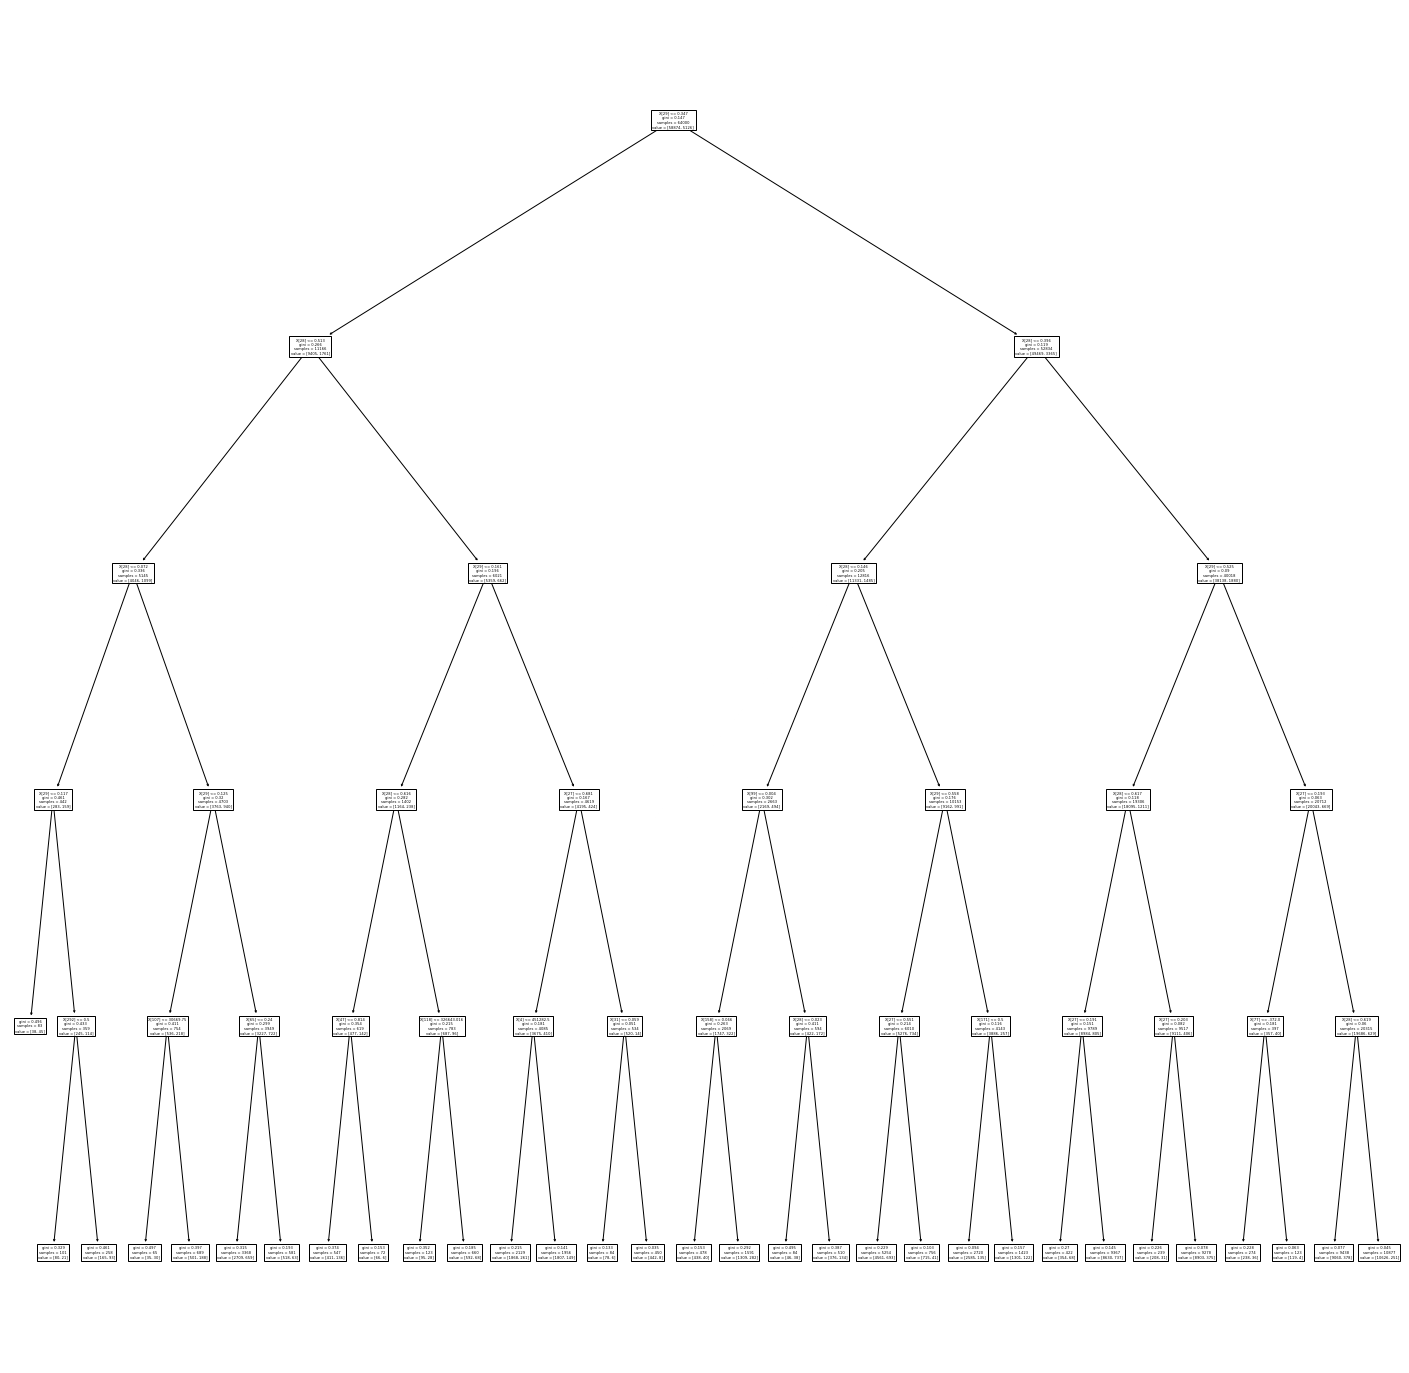

In [55]:
fig, ax = plt.subplots(figsize=(25, 25))
tree.plot_tree(clf, ax=ax)
plt.show()

In [56]:
def gini(x, w=None):
    x = np.asarray(x)
    if w is not None:
        w = np.asarray(w)
        sorted_indices = np.argsort(x)
        sorted_x = x[sorted_indices]
        sorted_w = w[sorted_indices]
        cumw = np.cumsum(sorted_w, dtype=float)
        cumxw = np.cumsum(sorted_x * sorted_w, dtype=float)
        return (np.sum(cumxw[1:] * cumw[:-1] - cumxw[:-1] * cumw[1:]) / 
                (cumxw[-1] * cumw[-1]))
    else:
        sorted_x = np.sort(x)
        n = len(x)
        cumx = np.cumsum(sorted_x, dtype=float)
        return (n + 1 - 2 * np.sum(cumx) / cumx[-1]) / n

In [57]:
giniall=gini(model_oh.predict_proba(X_train_oh)[:,1])

Nějak to furt predikuje nuly tak mi to je divné 

In [58]:
# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(predictors_num+predictors_cat, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: EXT_SOURCE_2         Importance: 0.43
Variable: EXT_SOURCE_3         Importance: 0.42
Variable: EXT_SOURCE_1         Importance: 0.05
Variable: AMT_REQ_CREDIT_BUREAU_DAY Importance: 0.03
Variable: AMT_GOODS_PRICE      Importance: 0.01
Variable: YEARS_BUILD_MODE     Importance: 0.01
Variable: FLOORSMAX_MEDI       Importance: 0.01
Variable: MEDIAN_AMTCR_0M_INFM Importance: 0.01
Variable: STD_AMTCR_0M_INFM_TYPE_EQ_ACTIVE Importance: 0.01
Variable: STD_DPD_0M_INFM_TYPE_EQ_CLOSED Importance: 0.01
Variable: CNT_CHILDREN         Importance: 0.0
Variable: AMT_INCOME_TOTAL     Importance: 0.0
Variable: AMT_CREDIT           Importance: 0.0
Variable: AMT_ANNUITY          Importance: 0.0
Variable: REGION_POPULATION_RELATIVE Importance: 0.0
Variable: DAYS_BIRTH           Importance: 0.0
Variable: DAYS_EMPLOYED        Importance: 0.0
Variable: DAYS_REGISTRATION    Importance: 0.0
Variable: DAYS_ID_PUBLISH      Importance: 0.0
Variable: OWN_CAR_AGE          Importance: 0.0
Variable: FLAG_MO

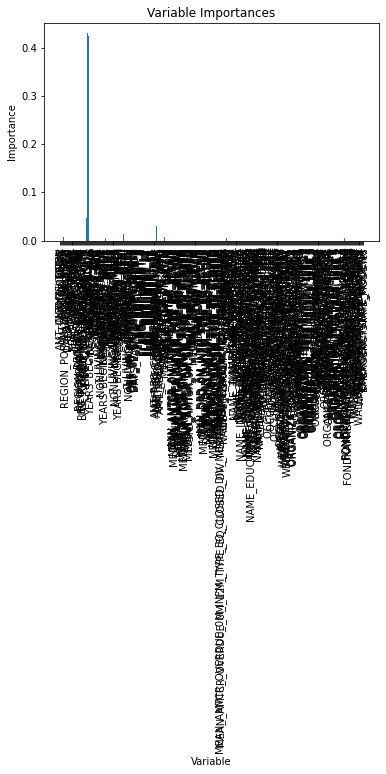

In [59]:
# Plot importance
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, predictors_num+predictors_one_hot, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### tady pouzivam mean encoding

In [60]:
# Predict class labels on training data
pred_labels_tr = model_mt.predict(X_train_mt)
# Predict class labels on a test data
pred_labels_te = model_mt.predict(X_test_mt)

In [61]:
# Tree summary and model evaluation metrics
print('*************** Tree Summary ***************')
print('Classes: ', clf.classes_)
print('Tree Depth: ', clf.tree_.max_depth)
print('No. of leaves: ', clf.tree_.n_leaves)
print('No. of features: ', clf.n_features_)
print('--------------------------------------------------------')
print("")

print('*************** Evaluation on Test Data ***************')
score_te = model_mt.score(X_test_mt, y_test_mt)
print('Accuracy Score: ', score_te)
# Look at classification report to evaluate the model
print(classification_report( y_test_mt, pred_labels_te))
print('--------------------------------------------------------')
print("")

print('*************** Evaluation on Training Data ***************')
score_tr = model_mt.score( X_train_mt, y_train_mt)
print('Accuracy Score: ', score_tr)
# Look at classification report to evaluate the model
print(classification_report(y_train_mt, pred_labels_tr))
print('--------------------------------------------------------')

*************** Tree Summary ***************
Classes:  [0. 1.]
Tree Depth:  5
No. of leaves:  31
No. of features:  312
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.91925
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     14710
         1.0       0.45      0.01      0.01      1290

    accuracy                           0.92     16000
   macro avg       0.68      0.50      0.49     16000
weighted avg       0.88      0.92      0.88     16000

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.920015625
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     58874
         1.0       0.54      0.01      0.02      5126

    accuracy                           0.92     64000
   macro avg       0.73      0.50      0.49     64

# Tak  jdem zkusit to boostovani

In [62]:
target='TARGET'


In [63]:
data_boost=data_cart[predictors_num+predictors_one_hot].copy()

In [64]:
data_boost[target]=data_cart[target]

In [65]:
num_trees=10
data_fraction=[]
predictors_fraction= []

clf_list = []

gini_list=[]
not_boost=[]


In [66]:
gini_list

[]

In [67]:
clf_list

[]

TRENOVANI + BOOSTOVANI do clf si ukladam stromy trenovane s boostovanim do not_boost si ukladam trenovane stromy bez predeslych informaci

In [68]:
import random
random.seed(7)
for i in range(num_trees) :
    data_fraction+= (random.sample(list(data_boost.index), int(0.3*len(data_boost))),) #train_index odpovídá data_fraction 
    data_fraction_index=data_fraction[i]
    predictors_fraction+=(random.sample(predictors_num+predictors_one_hot,round(0.3*data_boost.shape[1])),) #predictors_n odpovídá predictor_fraction
    fraction_predictors_n=predictors_fraction[i] #aktuální prediktory v tomto stromu
    
    model = tree.DecisionTreeClassifier(
        criterion=criterion,
        splitter=splitter, 
        max_depth=mdepth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf, 
        random_state=i,
        )
    
    
    
    if i==0 :
        prob = model_oh.predict_proba(data_boost.loc[data_fraction_index,predictors_num+predictors_one_hot])
        predict=model_oh.predict(data_boost.loc[data_fraction_index,predictors_num+predictors_one_hot])
        Sample_weight=abs(data_boost.loc[data_fraction_index,target]-prob[:,1])
        Sample_weight=Sample_weight/(Sample_weight.sum())
        clf = model.fit(data_boost.loc[data_fraction_index, fraction_predictors_n], data_boost.loc[data_fraction_index, target],sample_weight=Sample_weight)
        clf_list = clf_list + [model]
        notboost=model.fit(data_boost.loc[data_fraction_index, fraction_predictors_n], data_boost.loc[data_fraction_index, target])
        not_boost= not_boost +[notboost]
        gini_list+=(gini(model.predict_proba(X_train_oh[fraction_predictors_n])[:,1]),)
    else:
        jmenovatel=sum(gini_list)+giniall
        prob = model_oh.predict_proba(data_boost.loc[data_fraction_index,predictors_num+predictors_one_hot])
        prob=prob*(giniall/jmenovatel)
        for j in range(i):
            pomocna=clf_list[j].predict_proba(data_boost.loc[data_fraction_index,predictors_fraction[j]])
            prob=prob+pomocna*(gini_list[j]/jmenovatel)
        
        Sample_weight=abs(data_boost.loc[data_fraction_index,target]-prob[:,1])
        Sample_weight=Sample_weight/(Sample_weight.sum())
        clf = model.fit(data_boost.loc[data_fraction_index, fraction_predictors_n], data_boost.loc[data_fraction_index, target],sample_weight=Sample_weight)
        clf_list = clf_list + [model]
        notboost=model.fit(data_boost.loc[data_fraction_index, fraction_predictors_n], data_boost.loc[data_fraction_index, target])
        not_boost= not_boost +[notboost]
        gini_list+=(gini(model.predict_proba(X_train_oh[fraction_predictors_n])[:,1]),)
        
            
   
        
    
        
        


# zvlastni že strom bez boostovani dava stejnou predikci jako s boostovanim

In [69]:
clf_list[0].predict_proba(data_boost.loc[data_fraction[0],predictors_fraction[0]])[:,1]

array([0.06937524, 0.04744414, 0.10220656, ..., 0.10220656, 0.02617801,
       0.16413662])

In [70]:
data_boost.loc[data_fraction[0], target]

42445    0.0
19772    0.0
51750    0.0
6328     0.0
9494     0.0
        ... 
79824    0.0
17080    0.0
7675     0.0
67316    0.0
69671    0.0
Name: TARGET, Length: 24000, dtype: float64

In [71]:
not_boost[0].predict_proba(data_boost.loc[data_fraction[0],predictors_fraction[0]])[:,1]

array([0.06937524, 0.04744414, 0.10220656, ..., 0.10220656, 0.02617801,
       0.16413662])

## * toto jsou části kodu kde jsem zkoušel jestli funguje zadavani sampleweight 
## aby to nekazilo kod tak jsem to zakomentoval pomoci markdownu 

prob = model_oh.predict_proba(data_boost.loc[data_fraction_index,predictors_num+predictors_one_hot])
predict=model_oh.predict(data_boost.loc[data_fraction_index,predictors_num+predictors_one_hot])
Sample_weight=abs(data_boost.loc[data_fraction_index,target]-prob[:,1])*100

clf = model.fit(data_boost.loc[data_fraction_index, fraction_predictors_n], data_boost.loc[data_fraction_index, target],sample_weight=Sample_weight)
clf_list = clf_list + [model]
notboost=model.fit(data_boost.loc[data_fraction_index, fraction_predictors_n], data_boost.loc[data_fraction_index, target])
not_boost= not_boost +[notboost]
gini_list+=(gini(model.predict_proba(X_train_oh[fraction_predictors_n])[:,1]),)

Sample_weight=data_boost.loc[data_fraction_index, target]

Sample_weight.sum()

clf

notboost

data_boost.loc[data_fraction_index, target]

model_oh.predict_proba(data_boost.loc[data_fraction_index,predictors_num+predictors_one_hot])[:,1]

In [72]:
data_boost.loc[data_fraction_index,predictors_num+predictors_one_hot]

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,WALLSMATERIAL_MODEMixed,WALLSMATERIAL_MODEMonolithic,WALLSMATERIAL_MODENA,WALLSMATERIAL_MODEOthers,WALLSMATERIAL_MODEPanel,"WALLSMATERIAL_MODEStone, brick",WALLSMATERIAL_MODEWooden,EMERGENCYSTATE_MODENA,EMERGENCYSTATE_MODENo,EMERGENCYSTATE_MODEYes
52892,0.324648,90000.0,215640.0,15466.5,180000.0,0.019689,-13891.0000,-7080,-6858.0,-4417,...,0,0,0,0,0,0,0,0,1,0
34502,0.324648,157500.0,373140.0,40315.5,337500.0,0.006207,-16031.0774,-248,-1613.0,-4251,...,0,0,1,0,0,0,0,1,0,0
35041,0.000000,81000.0,191880.0,20277.0,180000.0,0.009175,-18318.0000,-206,-12137.0,-1853,...,0,0,0,0,1,0,0,0,1,0
39756,2.000000,72000.0,225000.0,11250.0,225000.0,0.019101,-13927.0000,-650,-4060.0,-4075,...,0,0,1,0,0,0,0,1,0,0
75586,0.324648,270000.0,1258650.0,53325.0,1125000.0,0.019689,-16031.0774,-1261,-5149.0,-5153,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69231,0.000000,135000.0,294322.5,17023.5,243000.0,0.003813,-16814.0000,-2575,-9047.0,-354,...,0,0,0,0,1,0,0,0,1,0
78804,0.000000,180000.0,1072669.5,30231.0,913500.0,0.025164,-19798.0000,-2762,-10.0,-3349,...,0,0,0,0,0,1,0,0,1,0
12108,0.324648,450000.0,552555.0,33034.5,477000.0,0.046220,-9982.0000,-1290,-3437.0,-965,...,0,0,0,0,1,0,0,0,1,0
57602,0.000000,225000.0,288873.0,18936.0,238500.0,0.010032,-15688.0000,-582,-663.0,-673,...,0,0,0,0,0,1,0,0,1,0


clf = model.fit(data_boost.loc[data_fraction_index, fraction_predictors_n], data_boost.loc[data_fraction_index, target],sample_weight=Sample_weight)

notboost=model.fit(data_boost.loc[data_fraction_index, fraction_predictors_n], data_boost.loc[data_fraction_index, target])

clf.predict_proba(data_boost.loc[data_fraction_index, fraction_predictors_n])[:,1]

notboost.predict_proba(data_boost.loc[data_fraction_index, fraction_predictors_n])[:,1]

Sample_weight

clf_list

prob = model_oh.predict_proba(data_boost.loc[data_fraction_index,predictors_num+predictors_one_hot])
predict=model_oh.predict(data_boost.loc[data_fraction_index,predictors_num+predictors_one_hot])

Sample_weight=abs(data_boost.loc[data_fraction_index,target]-prob[:,1])

Sample_weight

fit = model.fit(data_boost.loc[data_fraction_index, fraction_predictors_n], data_boost.loc[data_fraction_index, target],sample_weight=Sample_weight)

# Zde si jen zkouším co by to predikovalo na těch odevzdávacích datech {JÁRA}

In [73]:
data_finalvalid_original= pd.read_csv('C:/Users/macou/OneDrive/Dokumenty/ukol1datascience/hw1_outofsample.csv', encoding='utf-8')

In [74]:
data_finalvalid=data_finalvalid_original.copy()

In [75]:
for col in predictors_num:
    if data_finalvalid[col].dtypes=="float64":
        a=np.isinf(data_finalvalid[col]).sum()
        print(a)
        print(col)
        
        print(data_finalvalid[col].max())
        print('----------------------')
    
    

0
CNT_CHILDREN
7.0
----------------------
0
AMT_INCOME_TOTAL
4500000.0
----------------------
0
AMT_CREDIT
4050000.0
----------------------
0
AMT_ANNUITY
225000.0
----------------------
0
AMT_GOODS_PRICE
4050000.0
----------------------
0
REGION_POPULATION_RELATIVE
0.072508
----------------------
0
DAYS_BIRTH
-7689.0
----------------------
0
DAYS_REGISTRATION
0.0
----------------------
0
OWN_CAR_AGE
65.0
----------------------
0
CNT_FAM_MEMBERS
9.0
----------------------
0
EXT_SOURCE_1
0.9419858745171088
----------------------
0
EXT_SOURCE_2
0.8549996664047012
----------------------
0
EXT_SOURCE_3
0.8825303127941461
----------------------
0
APARTMENTS_AVG
1.0
----------------------
0
BASEMENTAREA_AVG
1.0
----------------------
0
YEARS_BEGINEXPLUATATION_AVG
1.0
----------------------
0
YEARS_BUILD_AVG
1.0
----------------------
0
COMMONAREA_AVG
1.0
----------------------
0
ELEVATORS_AVG
1.0
----------------------
0
ENTRANCES_AVG
1.0
----------------------
0
FLOORSMAX_AVG
1.0
-----------

In [76]:
data_finalvalid[predictors_cat]=data_finalvalid[predictors_cat].fillna('NA')

In [77]:
data_finalvalid[predictors_num]=data_finalvalid[predictors_num].fillna(data_finalvalid[predictors_num].mean())

In [78]:


for pred in predictors_cat:
    
    # TODO: Use pd.get_dummies to encode categorical predictors. Store the result to 'data_one_hot' dataframe
    # (only columns containing encoded values)
    possible_categories = list(set(list(data_cart[pred])))

    cat = data_finalvalid[pred]

    cat = cat.astype(pd.CategoricalDtype(categories=possible_categories))
    
    
    
    
    
    data_one_hot = pd.get_dummies(cat) #(TODO)
    data_one_hot.columns = [pred+col for col in data_one_hot.columns] #(TODO)
    
    # Join to data
    data_finalvalid = pd.concat([data_finalvalid, data_one_hot], axis=1)
    
   
    


In [79]:
for col in data_finalvalid.columns:
    print(col)

SK_ID_CURR
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APARTMENTS_M

In [80]:
for col in data_cart.columns:
    print(col)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

In [81]:
data_finalvalid=data_finalvalid.fillna(data_finalvalid.mean())

In [82]:
len(predictors_num+predictors_one_hot)

312

# tady pozorujeme v dummy variables něco co jsme nepozorovali v train datasetu takže proto to nefunguje 

In [85]:
prediction_final = model_oh.predict(data_finalvalid[predictors_num+predictors_one_hot])
prob_final = model_oh.predict_proba(data_finalvalid[predictors_num+predictors_one_hot])

#toto je predikce pouze prvního stromu

# predikce na základě naboostovaneho lesa 

In [86]:


jmenovatel=sum(gini_list)+giniall
prob = model_oh.predict_proba(data_finalvalid[predictors_num+predictors_one_hot])
prob=prob*(giniall/jmenovatel)
for j in range(num_trees):
    pomocna=clf_list[j].predict_proba(data_finalvalid.loc[:,predictors_fraction[j]])
    prob=prob+pomocna*(gini_list[j]/jmenovatel)
        


In [88]:
(clf_list[1].predict_proba(data_finalvalid.loc[:,predictors_fraction[1]])[:,1]>=0.5).astype(int).sum() #(TODO)

#predikce pomocí prvního již boostovaneho stromu

39

In [91]:
(prob[:,1]>=0.5).astype(int).sum() #predikce na zaklade lesa vubec nepredikuje jedničky...

0

In [93]:
vys=(prob[:,1]>=0.5).astype(int)

In [94]:
data_finalvalid['TARGET'] =vys

In [95]:
data_finalvalid['prediction'] = data_finalvalid['TARGET'] 
data_finalvalid['SK_ID_CURR'] = data_finalvalid_original['SK_ID_CURR']

In [96]:
data_finalvalid[['SK_ID_CURR','prediction']].to_csv('output1.csv',index=False)

0